In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

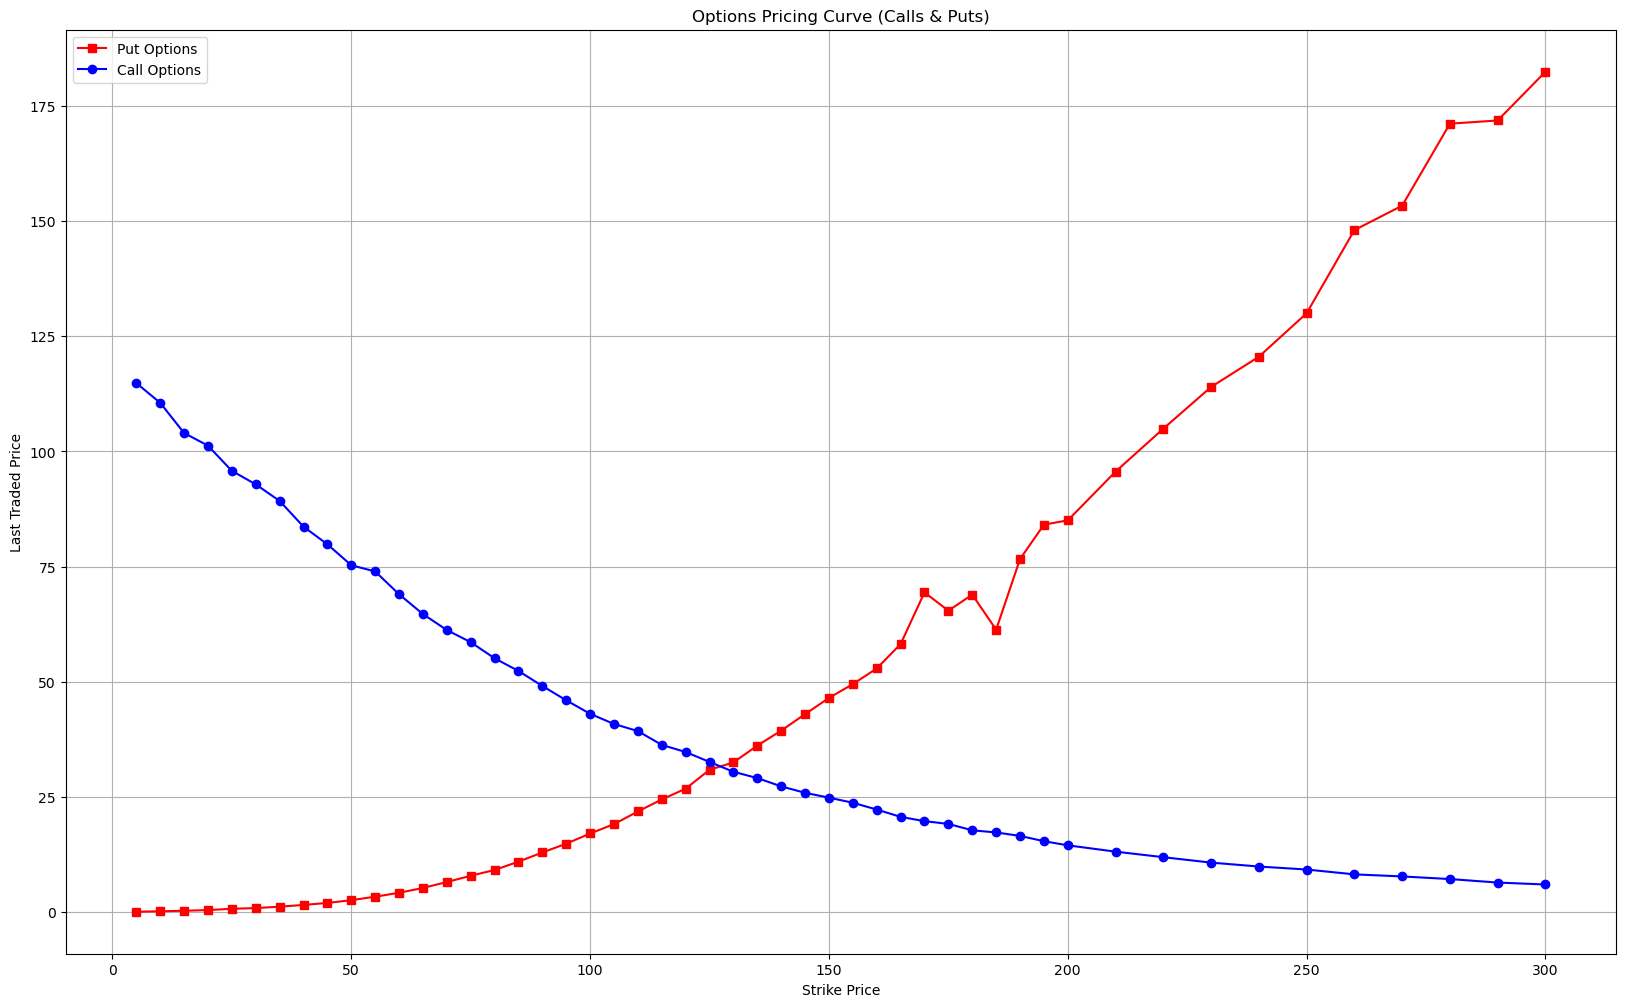

In [31]:
df = pd.read_csv('nvda_options_data.csv')
X = pd.read_csv('nvda_options_data.csv')
X = X.dropna()
# Plot last traded price vs. strike price
plt.figure(figsize=(20, 12))
plt.plot(df['strike'], df['PutPrice'], label='Put Options', marker='s', linestyle='-', color='red')
plt.plot(df['strike'], df['CallPrice'], label='Call Options', marker='o', linestyle='-', color='blue')
plt.xlabel("Strike Price")
plt.ylabel("Last Traded Price")
plt.title("Options Pricing Curve (Calls & Puts)")
plt.legend()
plt.grid()
plt.show()

In [32]:
def blsc(S, K, T, r, sigma, call=True):
    """
    Black-Scholes option pricing model.
    S: Current stock price
    K: Option strike price
    T: Time to expiration (in years)
    r: Risk-free interest rate
    sigma: Volatility of the underlying asset
    call: True for call option, False for put option
    """
    d1 = (np.log(S / K) + ((r + (0.5 * (sigma ** 2))) * T)) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))
    
    if call:
        return ((S * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2)))
    else:
        return ((K * np.exp(-r * T) * norm.cdf(-d2)) - (S * norm.cdf(-d1)))

In [33]:
def error(x,y):
        return np.sum(np.abs(np.array(x) - np.array(y)))*100/np.sum(np.array(y))

In [34]:
def aggregate(data, size=1):
        return np.array([np.mean(data[i:i + size]) for i in range(0, len(data), size)])

In [35]:
def algo(IV, Y,call):
    y_blsc = blsc(X['Stock_Price'], X['strike'], X['Time_to_Expire'], X['Risk_Free_Rate'], IV, call=call)
    print('Predicted:', y_blsc)
    loss = error(y_blsc,Y)
    print('Total Loss:',loss)
    
    # Plot the average results
    plt.figure(figsize=(20, 12))
    plt.plot(aggregate(pd.DataFrame(y_blsc)), label='Predicted', marker='o', linestyle='-', color='blue')
    plt.plot(aggregate(Y), label='Actual (Mean)', marker='s', linestyle='-', color='red')
    plt.title('Mean Predicted vs Actual Values')
    plt.xlabel('Chunk Index')
    plt.ylabel('Mean Value')
    plt.grid()
    plt.legend()
    plt.show()

Predicted: 0     113.259815
1     108.632243
2     104.021540
3      99.454637
4      94.962941
5      90.575697
6      86.316891
7      82.204464
8      78.250672
9      74.462911
10     70.844630
11     67.396198
12     64.115647
13     60.999291
14     58.042218
15     55.238682
16     52.582400
17     50.066786
18     47.685123
19     45.430698
20     43.296890
21     41.277243
22     39.365512
23     37.555696
24     35.842055
25     34.219124
26     32.681714
27     31.224911
28     29.844071
29     28.534814
30     27.293013
31     26.114782
32     24.996469
33     23.934639
34     22.926068
35     21.967726
36     21.056769
37     20.190527
38     19.366493
39     18.582315
40     17.124826
41     15.801956
42     14.599498
43     13.504904
44     12.507081
45     11.596207
46     10.763576
47     10.001460
48      9.302985
49      8.662034
dtype: float64
Total Loss: 6.2211221613320475


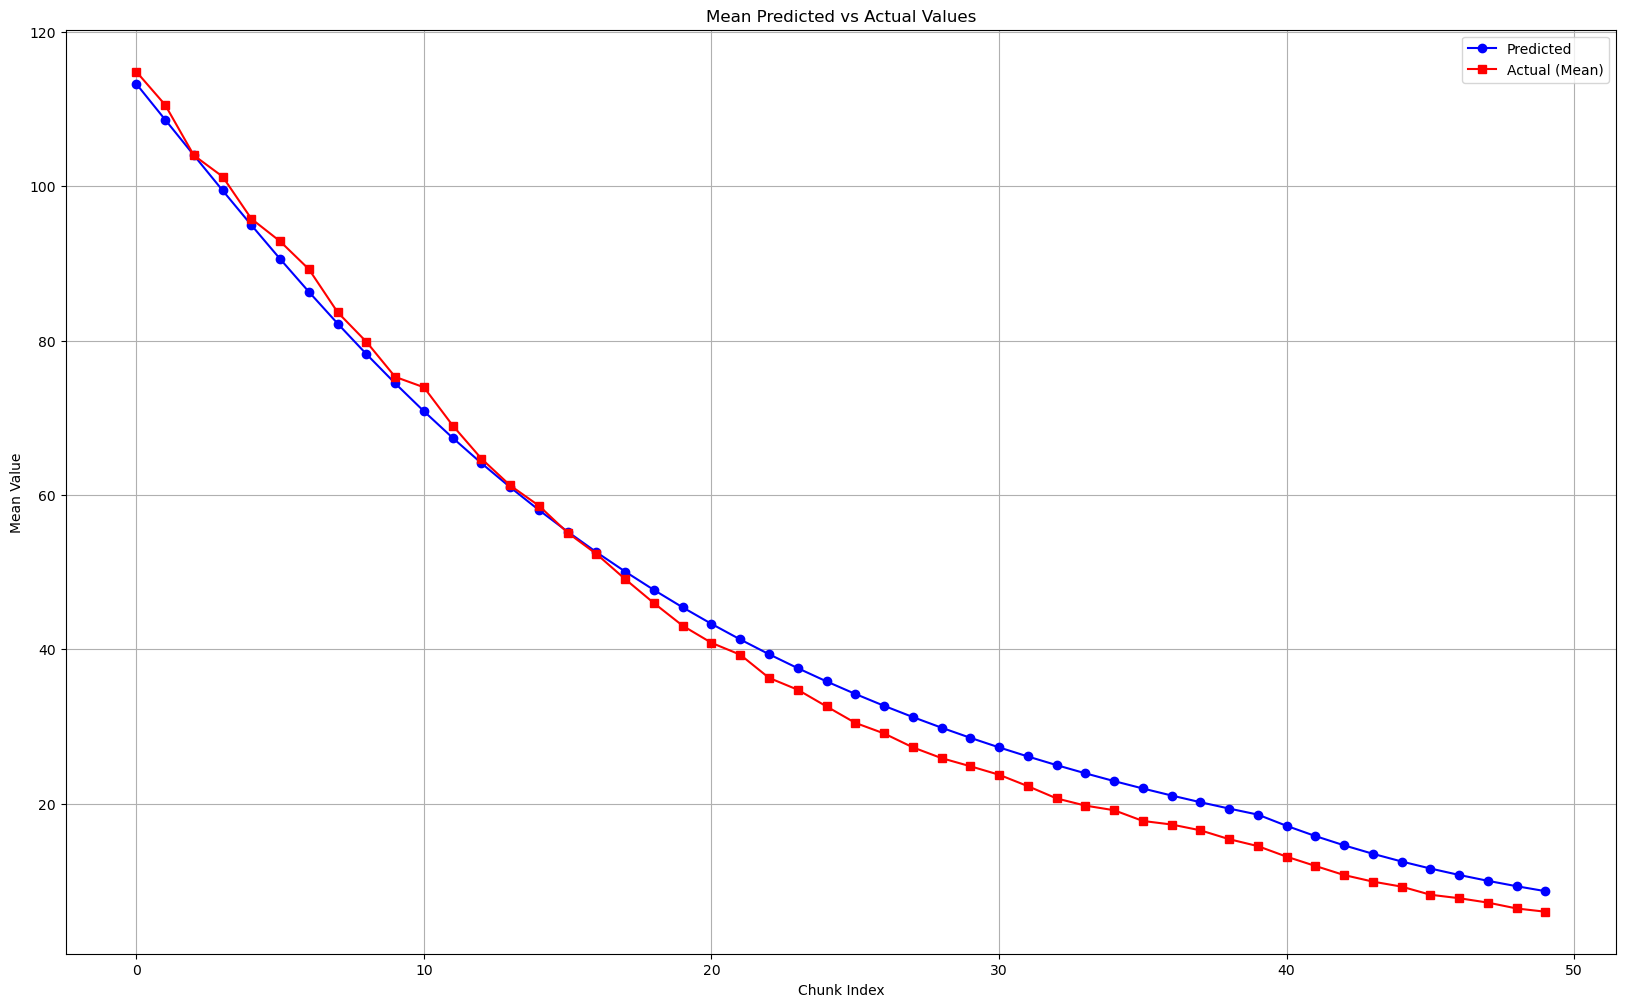

In [36]:
#Call
algo(X['IV'], X['CallPrice'],True)

Predicted: 0       0.000041
1       0.002695
2       0.022218
3       0.085540
4       0.224070
5       0.467052
6       0.838472
7       1.356270
8       2.032704
9       2.875169
10      3.887113
11      5.068906
12      6.418581
13      7.932451
14      9.605604
15     11.432293
16     13.406237
17     15.520848
18     17.769412
19     20.145212
20     22.641629
21     25.252208
22     27.970703
23     30.791112
24     33.707697
25     36.714992
26     39.807807
27     42.981230
28     46.230616
29     49.551584
30     52.940009
31     56.392004
32     59.903916
33     63.472313
34     67.093967
35     70.765850
36     74.485119
37     78.249102
38     82.055294
39     85.901342
40     93.704304
41    101.641886
42    109.699879
43    117.865736
44    126.128364
45    134.477942
46    142.905763
47    151.404098
48    159.966074
49    168.585574
dtype: float64
Total Loss: 7.159392691777871


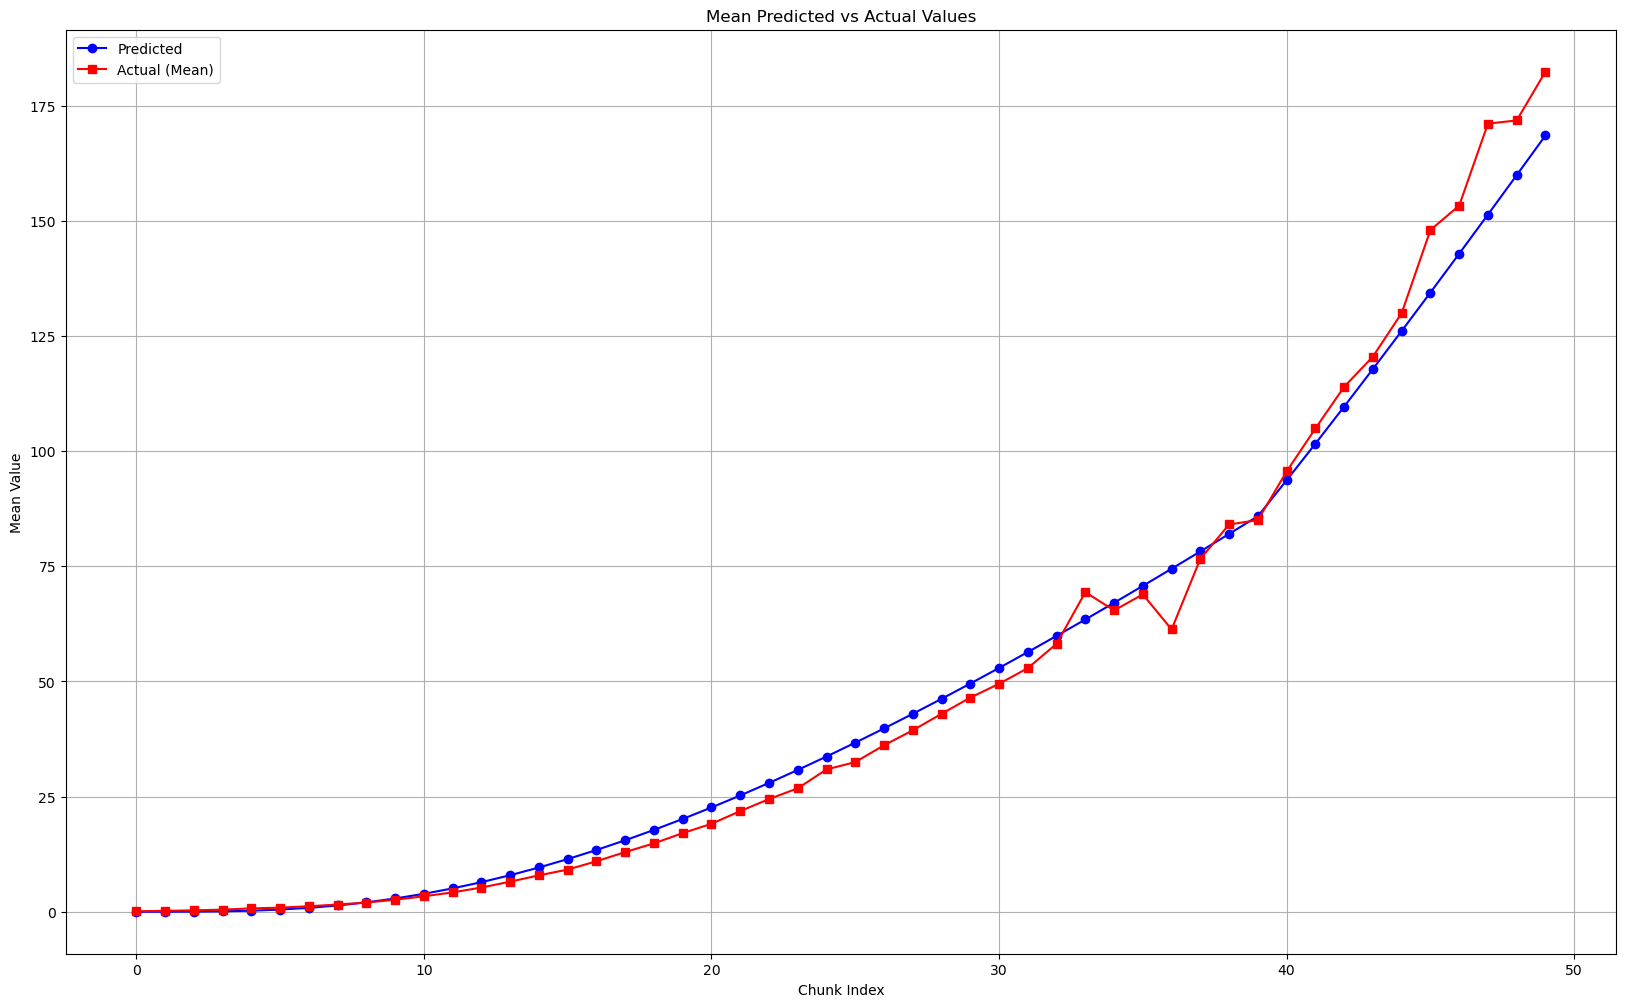

In [37]:
#Put
algo(X['IV'], X['PutPrice'],False)